# MODULE-2
# OBJECTIVE: Recommending 1000 new Targetted customers whoc can drive the most Value for Organization

In [836]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [837]:
files= os.listdir(r'.')

for i in files:
    if i.endswith('.xlsx'):
        print(i)

KPMG_VI_New_raw_data_update_final.xlsx


In [838]:
df_kpmg_raw= pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [839]:
df_cust_dem= pd.read_excel(df_kpmg_raw, 'CustomerDemographic')
df_trans= pd.read_excel(df_kpmg_raw, 'Transactions')
df_cust_addr= pd.read_excel(df_kpmg_raw, 'CustomerAddress')
df_new_cust= pd.read_excel(df_kpmg_raw, 'NewCustomerList')

In [840]:
df_cust_dem.head(4)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1.0,Aarika,Medendorp,F,93.0,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2.0,Aarika,Bockman,Male,81.0,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3.0,Abagail,Dearle,Male,61.0,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2020-02-01 00:00:00,Yes,15.0
3,4.0,Abba,NaN,Male,33.0,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0


In [841]:
df_cust_dem.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [842]:
df_trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [843]:
df_trans.customer_id[:5]

0    2950
1    3120
2     402
3    3135
4     787
Name: customer_id, dtype: int64

In [844]:
df_cust_dem.wealth_segment.unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth', nan],
      dtype=object)

In [845]:
# replacing Gender column with M and F

df_cust_dem.gender= df_cust_dem.gender.replace('M', 'Male')
df_cust_dem.gender= df_cust_dem.gender.replace('F', 'Female')
df_cust_dem.gender= df_cust_dem.gender.replace('Femal', 'Female')

df_cust_dem.gender= df_cust_dem.gender.replace('U', 'Unidentified')

In [846]:
df_cust_dem.gender.unique()

array(['Female', 'Male', 'Unidentified', nan], dtype=object)

# Analyzing the WEALTH of a customer to see if any co-relation with 
- Bike related Purchase in past 3 years

In [847]:
x_val_purch= df_cust_dem['gender']
y_val_wealth= df_cust_dem['past_3_years_bike_related_purchases']

max(df_cust_dem.past_3_years_bike_related_purchases)

99.0

In [848]:
#plt.bar( x_val_purch, y_val_wealth)
#plt.yticks(np.arange(0,100,2))
#plt.gcf().set_size_inches(15,12)
#plt.show()


In [849]:
# LISTING the columns of new customers 

df_new_cust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [850]:
df_new_cust.deceased_indicator.unique()

array(['N'], dtype=object)

# NEW CUSTOMER DATA ANALYSIS

In [851]:
df_new_cust.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.751080,0.842195,0.945427,0.873515,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.208439,0.247938,0.292257,0.280823,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.710000,0.648125,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.840000,0.920937,0.850000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.940000,1.025000,1.150000,1.051875,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


# DATASETS from AUSTRALIAN BUREAU of statistics
- Datasets include:
        # Median Weekly Earnings for Employees by INDUSTRY
        # Median Weekly Earnings for Employees by STATE and TERITORY

In [852]:
df_md_salary_industry=pd.read_csv('Median weekly earnings for employees by industry.csv')
df_md_salary_state=pd.read_csv('Median weekly earnings for employees by state and territory.csv')

In [853]:
df_md_salary_industry= df_md_salary_industry.rename(columns={df_md_salary_industry.columns[0]:'Industry'})

In [854]:
df_md_salary_industry.head(3)

,Industry,August 2014 ($),August 2019 ($)
0,"Agriculture, forestry and fishing",850.0,1038.0
1,Mining,2115.0,2300.0
2,Manufacturing,1050.0,1125.0


In [855]:
df_md_salary_industry.columns

Index(['Industry', 'August 2014 ($)', 'August 2019 ($)'], dtype='object')

In [856]:
df_md_salary_state.columns

Index(['Unnamed: 0', 'Aug-14 ($)', 'Aug-19 ($)'], dtype='object')

In [857]:
df_md_salary_state= df_md_salary_state.rename(columns={df_md_salary_state.columns[0]:'State'})

In [858]:
df_md_salary_state.columns

Index(['State', 'Aug-14 ($)', 'Aug-19 ($)'], dtype='object')

In [859]:
import seaborn as sns; sns.set()

# 1. ANLAYZING THE average weekly salary by INDUSTRY 

In [860]:
df_md_salary_industry.tail(3)

,Industry,August 2014 ($),August 2019 ($)
20,Source: Table 3.,NaN,NaN
21,NaN,NaN,NaN
22,"Source: Australian Bureau of Statistics, Char...",NaN,NaN


In [861]:
x_val= df_md_salary_industry.Industry[:-4]
y_val= df_md_salary_industry["August 2014 ($)"][:-4]

In [862]:
df_md_salary_state.describe()

,State,Aug-14 ($),Aug-19 ($)
count,10,8,8
unique,10,8,7
top,Source: Table 1.,924,"1,200"
freq,1,1,2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

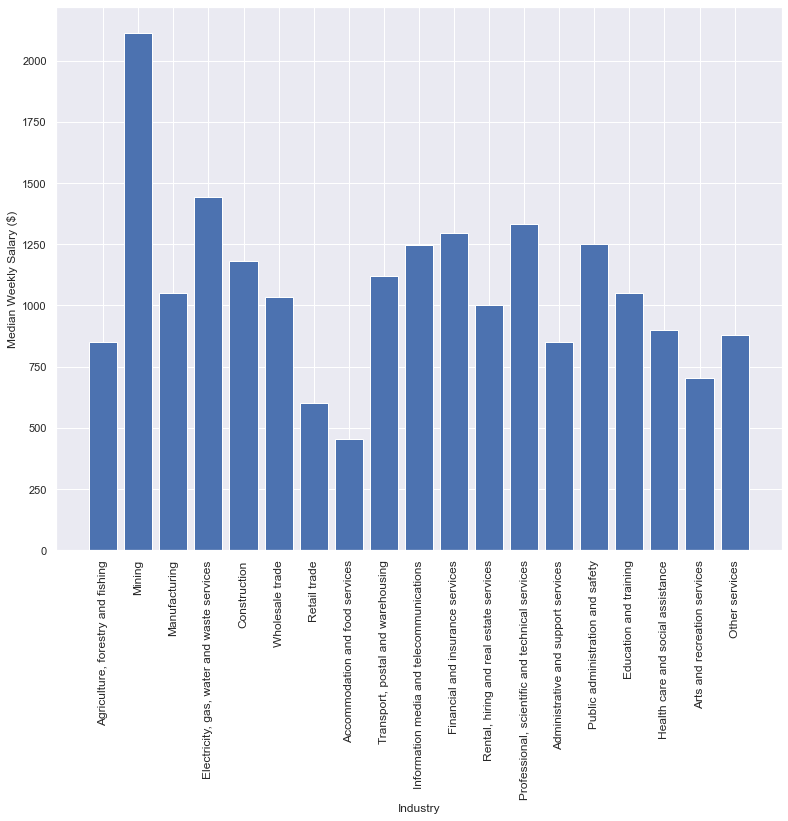

In [863]:
plt.bar(x_val, y_val)
plt.gcf().set_size_inches(13,10)
plt.xlabel('Industry')
plt.ylabel('Median Weekly Salary ($)')
plt.xticks(rotation="vertical", fontsize=12)

# 2. Analyzing the Second Dataset, MEDIAN salary of EACH STATE, AUS

# STATES of the New customers

In [864]:
df_new_cust.state.unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [865]:
df_md_salary_state.columns

Index(['State', 'Aug-14 ($)', 'Aug-19 ($)'], dtype='object')

In [866]:
x_val_st= df_md_salary_state.State[5:-4]
y_val_st= df_md_salary_state["Aug-19 ($)"][5:-4]

In [867]:
min(df_md_salary_state["Aug-19 ($)"][:-4])

'1,000'

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

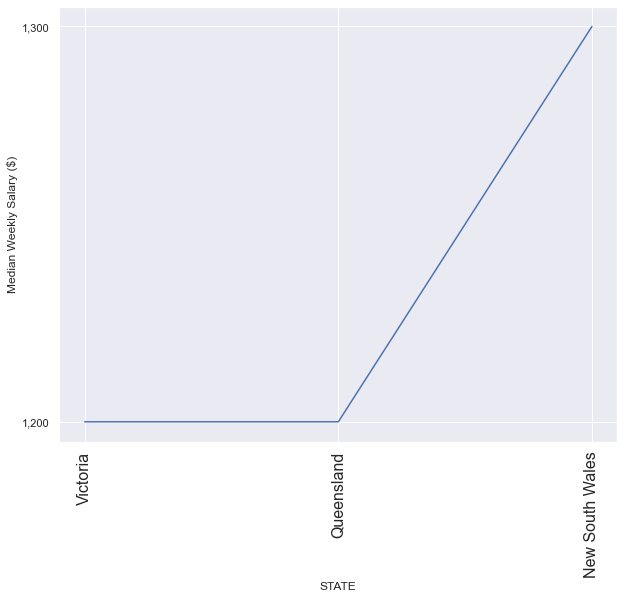

In [868]:
plt.plot(x_val_st, y_val_st)
plt.gcf().set_size_inches(10,8)
plt.xlabel('STATE')
plt.ylabel('Median Weekly Salary ($)')
plt.xticks(rotation="vertical", fontsize=16)

In [869]:
df_new_cust.job_industry_category.unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

In [870]:
# Renaming the STATE names with respect to the Records from the NEW Customer LIST
new_state_name= [ 'NSW','VIC', 'QLD']

## NEW CUSTOMER who have bought the products

In [871]:
df_new_cust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [872]:
df_new_cust.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

# NO significant Difference with Gender with PURCHASE made

In [873]:
purchase_new_cust=np.array(df_new_cust.past_3_years_bike_related_purchases)

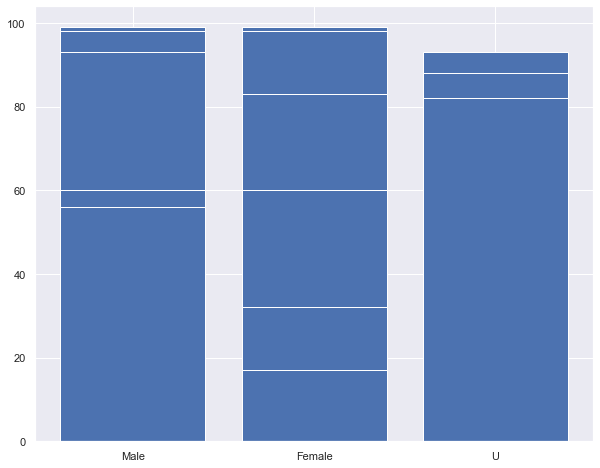

In [874]:
plt.bar(df_new_cust.gender, df_new_cust.past_3_years_bike_related_purchases)
plt.gcf().set_size_inches(10,8)

In [875]:
purchase_new_cust.sort()


In [876]:
purchase_new_cust[:-10]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,
       20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       24, 24, 24, 24, 24

In [877]:
df_new_cust.past_3_years_bike_related_purchases.describe()

count    1000.000000
mean       49.836000
std        27.796686
min         0.000000
25%        26.750000
50%        51.000000
75%        72.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

# TOP Customers who has spent more than 75 purchases within 3 YEARS

In [878]:
top_cust= df_new_cust[df_new_cust.past_3_years_bike_related_purchases.values > 75]

In [879]:
top_cust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.45,0.5625,0.703125,0.597656,1,1,1.718750
10,Rockwell,Matson,Male,94,1995-01-01,Programmer Analyst I,Retail,High Net Worth,N,No,...,QLD,Australia,6,0.98,0.9800,1.225000,1.225000,10,10,1.640625
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,8,0.60,0.7500,0.937500,0.937500,16,16,1.562500
17,Winnifred,Beswetherick,Female,83,1976-06-08,Actuary,Financial Services,Mass Customer,N,No,...,VIC,Australia,10,0.77,0.7700,0.962500,0.818125,17,17,1.546875
24,Brena,Schnitter,Female,78,1982-10-11,Account Executive,Manufacturing,Mass Customer,N,No,...,QLD,Australia,5,0.95,0.9500,0.950000,0.807500,25,25,1.484375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,Daryle,Marginson,Male,93,1986-06-27,Environmental Tech,Argiculture,Mass Customer,N,Yes,...,NSW,Australia,12,0.44,0.5500,0.687500,0.584375,979,979,0.416500
981,Leona,Shorrock,Female,83,1951-08-23,Senior Quality Engineer,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,1,0.81,1.0125,1.265625,1.265625,979,979,0.416500
984,Pauline,Dallosso,U,82,NaT,Desktop Support Technician,IT,Affluent Customer,N,Yes,...,NSW,Australia,10,0.85,1.0625,1.328125,1.328125,985,985,0.408000
985,Lauralee,Fudge,Female,83,1987-09-21,Research Nurse,Health,Mass Customer,N,No,...,VIC,Australia,4,1.09,1.0900,1.362500,1.158125,985,985,0.408000


# TOP Customers whose PROPERTY VALUATION is higher

In [880]:
top_cust.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,87.370892,11.192488,3106.319249,7.272300,0.740423,0.830270,1.011793,0.931946,500.901408,500.901408,0.877627
std,6.812758,5.062397,869.701077,2.698887,0.211462,0.254265,0.321862,0.313203,282.512973,282.512973,0.285648
min,76.000000,0.000000,2009.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.399500
25%,82.000000,7.000000,2232.000000,6.000000,0.570000,0.610000,0.737500,0.680000,271.000000,271.000000,0.656250
50%,87.000000,11.000000,3040.000000,8.000000,0.730000,0.810000,0.968750,0.906250,513.000000,513.000000,0.841500
75%,94.000000,15.000000,4014.000000,9.000000,0.930000,1.020000,1.262500,1.150000,744.000000,744.000000,1.060000
max,99.000000,22.000000,4720.000000,12.000000,1.100000,1.375000,1.718750,1.718750,988.000000,988.000000,1.718750


# ANALYZING customer with HIGH property Valuation and purchases total

In [881]:
top_cust.property_valuation.describe()

count    213.000000
mean       7.272300
std        2.698887
min        1.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       12.000000
Name: property_valuation, dtype: float64

In [882]:
x_val_property= top_cust[top_cust.property_valuation.values >= 2 ]['property_valuation']
y_val_property= top_cust[top_cust.property_valuation.values >= 2 ]['past_3_years_bike_related_purchases']

In [883]:
import seaborn as sns; sns.set()

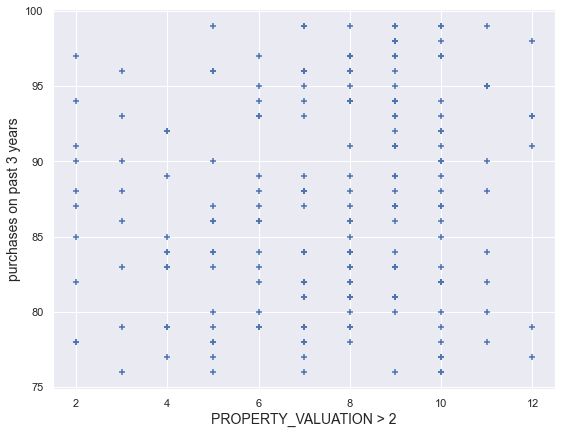

In [884]:
plt.scatter(x_val_property, y_val_property, marker="+")
plt.xlabel("PROPERTY_VALUATION > 2", fontsize=14)
plt.ylabel("purchases on past 3 years", fontsize=14)
plt.gcf().set_size_inches(9,7)

# TOP customers who has spent more in 3 years AND has also HIGH property Valuation
- Property Valuation higher than '5' and below '10' has spent the most in 3 Years of time

In [885]:
potential_cust= top_cust[top_cust.property_valuation.values >=5 ]
potential_cust= potential_cust[potential_cust.property_valuation <=10]

In [886]:
potential_cust.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,161.00000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,87.52795,11.198758,3076.720497,7.900621,0.748075,0.838587,1.021417,0.939698,496.409938,496.409938,0.884463
std,6.89752,5.194733,841.740809,1.562070,0.214996,0.259630,0.325987,0.319650,285.112817,285.112817,0.292565
min,76.00000,0.000000,2009.000000,5.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.399500
25%,82.00000,7.000000,2232.000000,7.000000,0.570000,0.600000,0.737500,0.680000,271.000000,271.000000,0.650781
50%,87.00000,11.000000,3029.000000,8.000000,0.740000,0.820000,0.987500,0.909500,513.000000,513.000000,0.841500
75%,94.00000,15.000000,4000.000000,9.000000,0.940000,1.037500,1.281250,1.150000,748.000000,748.000000,1.060000
max,99.00000,22.000000,4703.000000,10.000000,1.100000,1.375000,1.718750,1.718750,988.000000,988.000000,1.718750


# CUSTOMERs Info who can be the potential NEW targetted customers to DRIVE most VALUE for the ORGANIZATION

In [887]:
potential_cust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [888]:
final_potential_cust= potential_cust[['first_name', 'last_name','gender', 'DOB', 'past_3_years_bike_related_purchases','property_valuation','job_title','job_industry_category','address','state']]

In [889]:
final_potential_cust= final_potential_cust.reset_index()
final_potential_cust= final_potential_cust.drop(columns=['index'])
final_potential_cust.head(3)

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state
0,Chickie,Brister,Male,1957-07-12,86,6,General Manager,Manufacturing,45 Shopko Center,QLD
1,Rockwell,Matson,Male,1995-01-01,94,6,Programmer Analyst I,Retail,3682 Crowley Point,QLD
2,Dukie,Swire,Male,1954-03-31,88,8,NaN,Manufacturing,64 Granby Parkway,NSW


In [890]:
potential_cust.wealth_segment.unique()

array(['Mass Customer', 'High Net Worth', 'Affluent Customer'],
      dtype=object)

In [891]:
final_potential_cust.to_csv('top_potential_customers.csv', index=False)

# Checking if there any null values on the NEW TOP customers

In [892]:
final_potential_cust.head(3)

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state
0,Chickie,Brister,Male,1957-07-12,86,6,General Manager,Manufacturing,45 Shopko Center,QLD
1,Rockwell,Matson,Male,1995-01-01,94,6,Programmer Analyst I,Retail,3682 Crowley Point,QLD
2,Dukie,Swire,Male,1954-03-31,88,8,NaN,Manufacturing,64 Granby Parkway,NSW


In [893]:
for i in range(len(final_potential_cust.columns)):
    print(final_potential_cust.columns[i], ":", final_potential_cust[final_potential_cust.columns[i]].isnull().sum())

first_name : 0
last_name : 2
gender : 0
DOB : 2
past_3_years_bike_related_purchases : 0
property_valuation : 0
job_title : 18
job_industry_category : 28
address : 0
state : 0


# Narrowing down the TOP customer based on JOB INDUSTRY median SALARY

In [894]:
# NEW TOP customer on this datasets from the AUS LABOR BUREAU of statistics

df_md_salary_industry.Industry.unique()

array(['Agriculture, forestry and fishing', 'Mining', 'Manufacturing',
       'Electricity, gas, water and waste services', 'Construction',
       'Wholesale trade', 'Retail trade',
       'Accommodation and food services',
       'Transport, postal and warehousing',
       'Information media and telecommunications',
       'Financial and insurance services',
       'Rental, hiring and real estate services',
       'Professional, scientific and technical services',
       'Administrative and support services',
       'Public administration and safety', 'Education and training',
       'Health care and social assistance',
       'Arts and recreation services', 'Other services', nan,
       'Source: Table 3.',
       'Source: Australian Bureau of Statistics,  Characteristics of Employment, Australia August 2019'],
      dtype=object)

In [895]:
final_potential_cust.job_industry_category.unique()

array(['Manufacturing', 'Retail', 'Financial Services', 'Entertainment',
       nan, 'Property', 'Health', 'Telecommunications', 'IT',
       'Argiculture'], dtype=object)

In [896]:
# NEW CUSTOMERS job industry 
new_cust_job_industry= ['Manufacturing','Financial and insurance services','Retail trade','Health care and social assistance','Information media and telecommunications','Agriculture, forestry and fishing','Professional, scientific and technical services','rts and recreation services']



In [897]:
df_md_salary_industry.describe()

,August 2014 ($),August 2019 ($)
count,19.000000,19.000000
mean,1071.421053,1203.421053
std,359.891545,384.816308
min,456.000000,500.000000
25%,865.000000,981.500000
50%,1050.000000,1150.000000
75%,1249.000000,1398.500000
max,2115.000000,2300.000000


In [898]:
df_md_salary_industry.columns

Index(['Industry', 'August 2014 ($)', 'August 2019 ($)'], dtype='object')

In [899]:
new_cust_job_industry

['Manufacturing',
 'Financial and insurance services',
 'Retail trade',
 'Health care and social assistance',
 'Information media and telecommunications',
 'Agriculture, forestry and fishing',
 'Professional, scientific and technical services',
 'rts and recreation services']

In [900]:
df_md_salary_industry.Industry

0                     Agriculture, forestry and fishing
1                                                Mining
2                                         Manufacturing
3            Electricity, gas, water and waste services
4                                          Construction
5                                       Wholesale trade
6                                          Retail trade
7                       Accommodation and food services
8                     Transport, postal and warehousing
9              Information media and telecommunications
10                     Financial and insurance services
11              Rental, hiring and real estate services
12      Professional, scientific and technical services
13                  Administrative and support services
14                     Public administration and safety
15                               Education and training
16                    Health care and social assistance
17                         Arts and recreation s

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

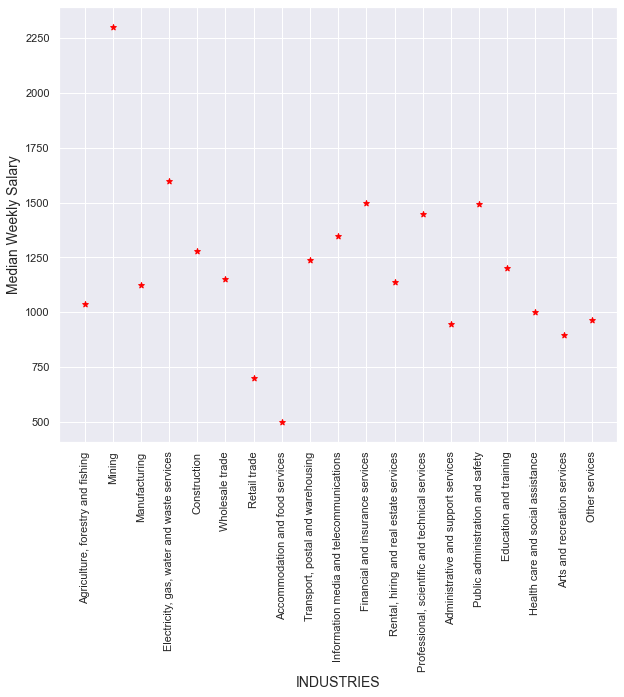

In [901]:
plt.scatter(df_md_salary_industry.Industry[:-4], df_md_salary_industry["August 2019 ($)"][:-4], marker="*", color='red' )
plt.gcf().set_size_inches(10,8)
plt.xlabel("INDUSTRIES", fontsize= 14)
plt.ylabel("Median Weekly Salary", fontsize= 14)
plt.xticks(rotation="vertical")

# CLUSTER ANALYSIS ON DOB and GENDER

In [956]:
val_gender_dob= final_potential_cust[['gender','DOB','past_3_years_bike_related_purchases']]


In [957]:
# DROP null values

val_gender_dob= val_gender_dob.dropna()
val_gender_dob

,gender,DOB,past_3_years_bike_related_purchases
0,Male,1957-07-12,86
1,Male,1995-01-01,94
2,Male,1954-03-31,88
3,Female,1976-06-08,83
4,Female,1982-10-11,78
...,...,...,...
155,Female,1998-10-14,78
156,Male,1969-01-05,82
157,Male,1998-06-03,82
158,Male,1977-02-12,77


# NEW Dataframe of GENDER and Birth YEAR only

In [967]:
val_gender_dob.head(3)

,gender,DOB,past_3_years_bike_related_purchases,year,month
0,Male,1957-07-12,86,1957,7
1,Male,1995-01-01,94,1995,1
2,Male,1954-03-31,88,1954,3


In [958]:
val_gender_dob['DOB']= pd.to_datetime(val_gender_dob['DOB'])

In [959]:
val_gender_dob['year'], val_gender_dob['month']= val_gender_dob['DOB'].dt.year, val_gender_dob['DOB'].dt.month

In [968]:

new_gender_dob= val_gender_dob[['gender', 'year','past_3_years_bike_related_purchases']]
new_gender_dob= new_gender_dob.reset_index()
new_gender_dob=  new_gender_dob.drop(columns=['index'])
new_gender_dob

,gender,year,past_3_years_bike_related_purchases
0,Male,1957,86
1,Male,1995,94
2,Male,1954,88
3,Female,1976,83
4,Female,1982,78
...,...,...,...
154,Female,1998,78
155,Male,1969,82
156,Male,1998,82
157,Male,1977,77


In [969]:
new_gender_dob['gender'].unique()

array(['Male', 'Female'], dtype=object)

# HOT encoding the GENDER column

In [970]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

en= OneHotEncoder()

In [971]:
x_val_gen= np.array(new_gender_dob['gender'])
x_val_gen= x_val_gen.reshape(-1,1)
x_val_gen[:4]

array([['Male'],
       ['Male'],
       ['Male'],
       ['Female']], dtype=object)

In [972]:
label_en= LabelEncoder()

x_val_gen= label_en.fit_transform(x_val_gen)
x_val_gen

C:\Users\daiko\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0])

In [973]:
new_gender_dob['gender']= x_val_gen

In [974]:
new_gender_dob.head(3)

,gender,year,past_3_years_bike_related_purchases
0,1,1957,86
1,1,1995,94
2,1,1954,88


# CLUSTER analysis of AGE 

In [975]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters= 2)
kmeans.fit(new_gender_dob)

y_kmeans= kmeans.predict(new_gender_dob)
y_kmeans

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1])

In [976]:
# getting the CENTROIDS

centroids= kmeans.cluster_centers_
print(centroids)

[[4.41558442e-01 1.98346753e+03 8.75714286e+01]
 [5.36585366e-01 1.95800000e+03 8.74878049e+01]]


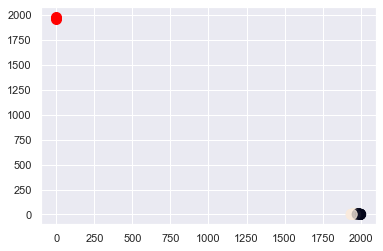

In [977]:
plt.scatter( new_gender_dob['year'], new_gender_dob['gender'], c=kmeans.labels_.astype(float), s= 100, alpha= 0.75 )
plt.scatter( centroids[:, 0], centroids[:, 1], c='red', s= 100)
plt.show()

# KMEANS clustering with age of customer and Products purchase in 3 years

[[5.36585366e-01 1.95800000e+03 8.74878049e+01]
 [4.41558442e-01 1.98346753e+03 8.75714286e+01]]


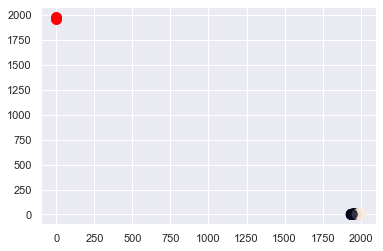

In [978]:
kmeans= KMeans(n_clusters= 2)
kmeans.fit(new_gender_dob)

y_kmeans= kmeans.predict(new_gender_dob)
y_kmeans

# getting the CENTROIDS

centroids= kmeans.cluster_centers_
print(centroids)

plt.scatter( new_gender_dob['year'], new_gender_dob['gender'], c=kmeans.labels_.astype(float), s= 100, alpha= 0.75 )
plt.scatter( centroids[:, 0], centroids[:, 1], c='red', s= 100)
plt.show()

# SCATTER PLOT 

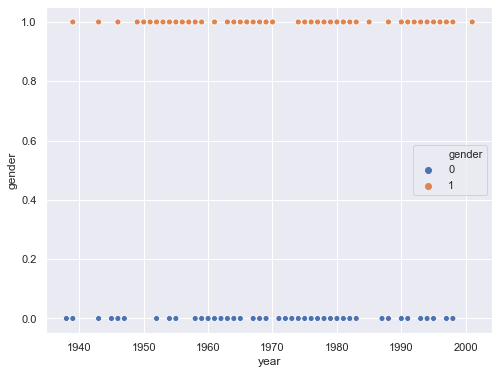

In [979]:
sns.scatterplot(y="gender", x="year", data=new_gender_dob, hue='gender')
plt.gcf().set_size_inches(8,6)
plt.show()

In [983]:
new_gender_dob.columns

Index(['gender', 'year', 'past_3_years_bike_related_purchases'], dtype='object')

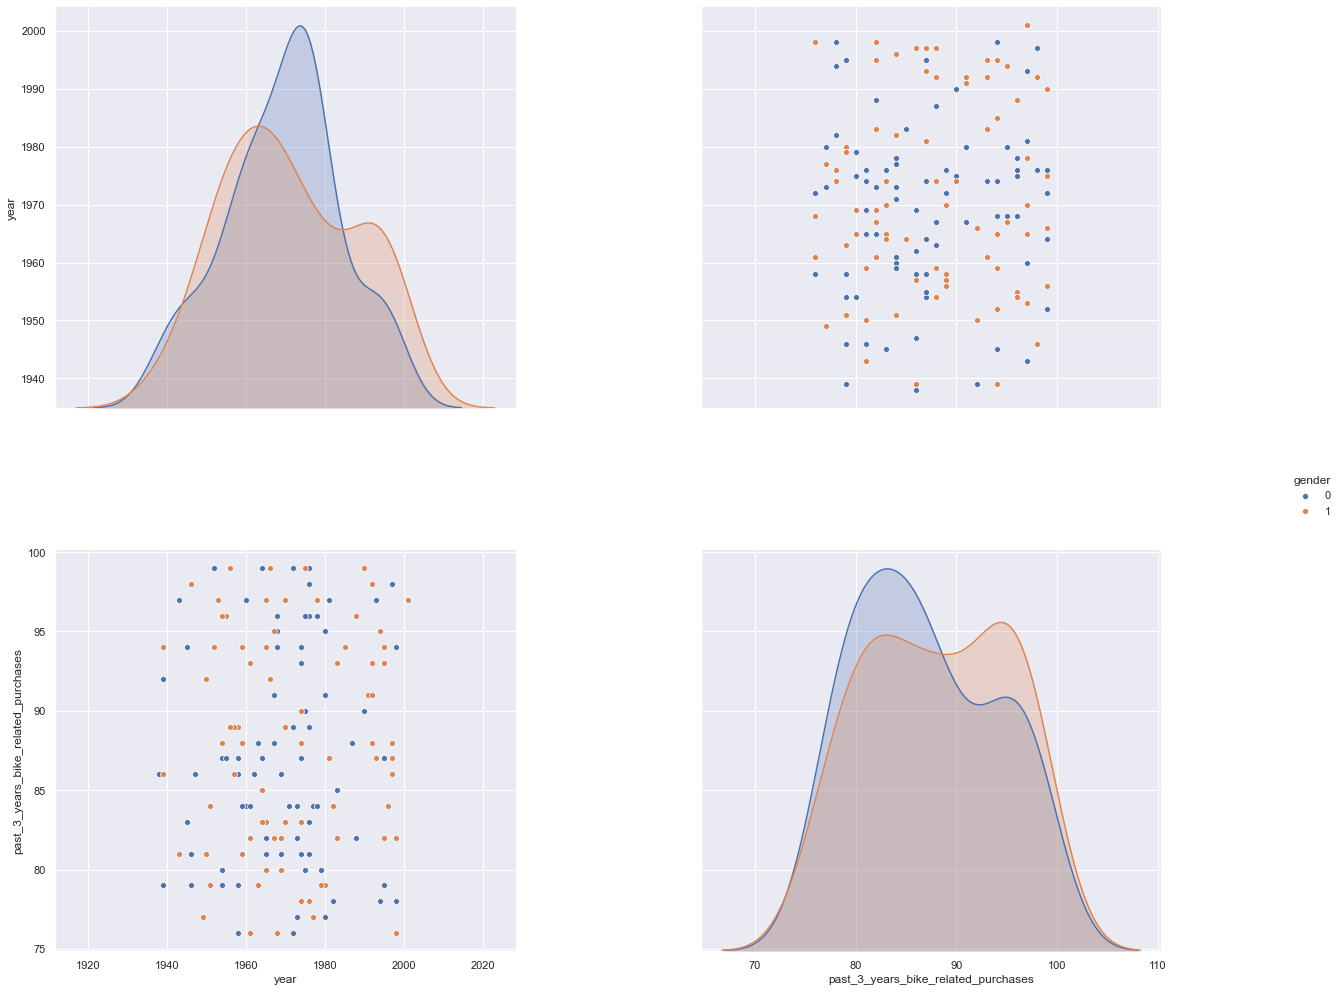

In [990]:
sns.pairplot(new_gender_dob, hue='gender')
plt.gcf().set_size_inches(20,15)
plt.show()

****************************************************************
*************************************************************

##########################################################################

# Siginificant FEATRUES to learn about NEW CUSTOMER

# DOB, job_industry, property_valuation,

In [919]:
final_potential_cust.head(3)

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state
0,Chickie,Brister,Male,1957-07-12,86,6,General Manager,Manufacturing,45 Shopko Center,QLD
1,Rockwell,Matson,Male,1995-01-01,94,6,Programmer Analyst I,Retail,3682 Crowley Point,QLD
2,Dukie,Swire,Male,1954-03-31,88,8,NaN,Manufacturing,64 Granby Parkway,NSW


In [920]:
final_potential_cust.columns

Index(['first_name', 'last_name', 'gender', 'DOB',
       'past_3_years_bike_related_purchases', 'property_valuation',
       'job_title', 'job_industry_category', 'address', 'state'],
      dtype='object')

In [921]:
final_potential_cust['DOB']= pd.to_datetime(final_potential_cust.DOB)


In [922]:
final_potential_cust['year'], final_potential_cust['month']= final_potential_cust['DOB'].dt.year, final_potential_cust['DOB'].dt.month

In [923]:
final_potential_cust.head(3)

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state,year,month
0,Chickie,Brister,Male,1957-07-12,86,6,General Manager,Manufacturing,45 Shopko Center,QLD,1957.0,7.0
1,Rockwell,Matson,Male,1995-01-01,94,6,Programmer Analyst I,Retail,3682 Crowley Point,QLD,1995.0,1.0
2,Dukie,Swire,Male,1954-03-31,88,8,NaN,Manufacturing,64 Granby Parkway,NSW,1954.0,3.0


In [924]:
final_cust= final_potential_cust
final_cust.head(2)

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state,year,month
0,Chickie,Brister,Male,1957-07-12,86,6,General Manager,Manufacturing,45 Shopko Center,QLD,1957.0,7.0
1,Rockwell,Matson,Male,1995-01-01,94,6,Programmer Analyst I,Retail,3682 Crowley Point,QLD,1995.0,1.0


In [925]:
final_cust.describe()

,past_3_years_bike_related_purchases,property_valuation,year,month
count,161.00000,161.000000,159.000000,159.000000
mean,87.52795,7.900621,1970.333333,6.257862
std,6.89752,1.562070,15.552958,3.473615
min,76.00000,5.000000,1938.000000,1.000000
25%,82.00000,7.000000,1959.000000,3.000000
50%,87.00000,8.000000,1970.000000,7.000000
75%,94.00000,9.000000,1980.000000,9.000000
max,99.00000,10.000000,2001.000000,12.000000


# Checking for NON values in the DATA FRAME

In [926]:
final_cust.isna().sum()

first_name                              0
last_name                               2
gender                                  0
DOB                                     2
past_3_years_bike_related_purchases     0
property_valuation                      0
job_title                              18
job_industry_category                  28
address                                 0
state                                   0
year                                    2
month                                   2
dtype: int64

# CUstomers with MISSING DOB 

In [927]:

final_cust[final_cust.year.isna()]

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state,year,month
71,Johna,Bunker,U,NaT,93,6,Tax Accountant,IT,3686 Waubesa Way,VIC,NaN,NaN
159,Pauline,Dallosso,U,NaT,82,10,Desktop Support Technician,IT,9594 Badeau Street,NSW,NaN,NaN


In [928]:
final_cust= final_cust.drop([71, 159])

final_cust.year.isna().sum()

0

In [929]:
final_cust.year.describe()

count     159.000000
mean     1970.333333
std        15.552958
min      1938.000000
25%      1959.000000
50%      1970.000000
75%      1980.000000
max      2001.000000
Name: year, dtype: float64

In [930]:
final_cust['year']= final_cust['year'].astype(int)

Text(0, 0.5, 'Purchases in 3 years')

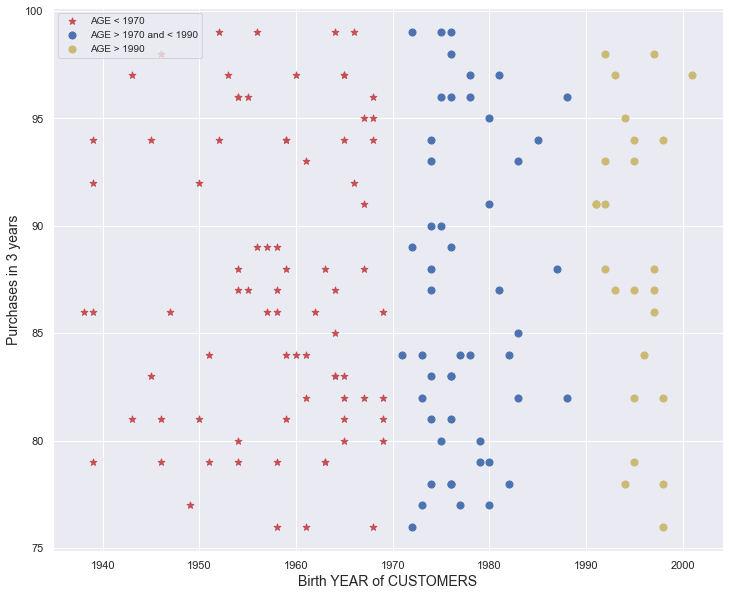

In [931]:

#ax= fig.add_subplot(111, projection ='3d')
#ax.scatter( final_cust.year[])


x_1= final_cust.year[final_cust['year'].values < 1970]
y_1= final_cust['past_3_years_bike_related_purchases'][final_cust['year'].values < 1970]

x_2= final_cust.year[(final_cust['year'].values > 1970 ) & (final_cust['year'].values < 1990)]
y_2= final_cust['past_3_years_bike_related_purchases'][(final_cust['year'].values > 1970 ) & (final_cust['year'].values < 1990)]

x_3= final_cust.year[final_cust['year'].values > 1990]
y_3= final_cust['past_3_years_bike_related_purchases'][final_cust['year'].values >1990]


fig= plt.figure(figsize= (12,10))

ax= fig.add_subplot(111)

ax.scatter(x_1, y_1 ,c= 'r',s =50, marker= '*', label="AGE < 1970")
#plt.scatter(x_2, y_2 ,c= 'blue', s= 60)

ax.scatter(x_2, y_2 , c= 'b', s=50, marker= 'o', label="AGE > 1970 and < 1990")
ax.scatter(x_3, y_3 , c= 'y', s=50, marker= 'o', label="AGE > 1990")
plt.legend(loc="upper left", fontsize= 10);
plt.xlabel("Birth YEAR of CUSTOMERS", fontsize =14)
plt.ylabel("Purchases in 3 years", fontsize =14)


# Finding the TOP CUSTOMERS who does not hold any JOBS 
- List out the Birth YEAR of the customer
- List out the property valuation
- list out the Purchases made within 3 YEARS

# Customers without JOB TITLE with DOB year

In [932]:
final_cust.year[final_cust.job_title.isna()]

2      1954
8      1946
9      1961
10     1981
14     1958
16     1977
29     1959
30     1983
49     1991
64     1961
66     1946
81     1964
90     1954
123    1983
124    1938
147    1939
157    1998
160    1945
Name: year, dtype: int32

# Customers without JOB Title made purchases within 3 years

In [997]:
final_cust[final_cust['job_title'].isna()].describe()

,past_3_years_bike_related_purchases,property_valuation,year,month
count,18.000000,18.000000,18.000000,18.000000
mean,84.388889,8.111111,1963.222222,5.722222
std,5.510833,1.490712,18.219432,3.785507
min,76.000000,5.000000,1938.000000,1.000000
25%,81.250000,8.000000,1948.000000,3.000000
50%,84.000000,8.000000,1960.000000,4.500000
75%,86.750000,9.000000,1980.000000,8.750000
max,97.000000,10.000000,1998.000000,12.000000


In [933]:
final_cust.columns

Index(['first_name', 'last_name', 'gender', 'DOB',
       'past_3_years_bike_related_purchases', 'property_valuation',
       'job_title', 'job_industry_category', 'address', 'state', 'year',
       'month'],
      dtype='object')

# Segmentation of job industry category 

# 1. BASED on GENDER

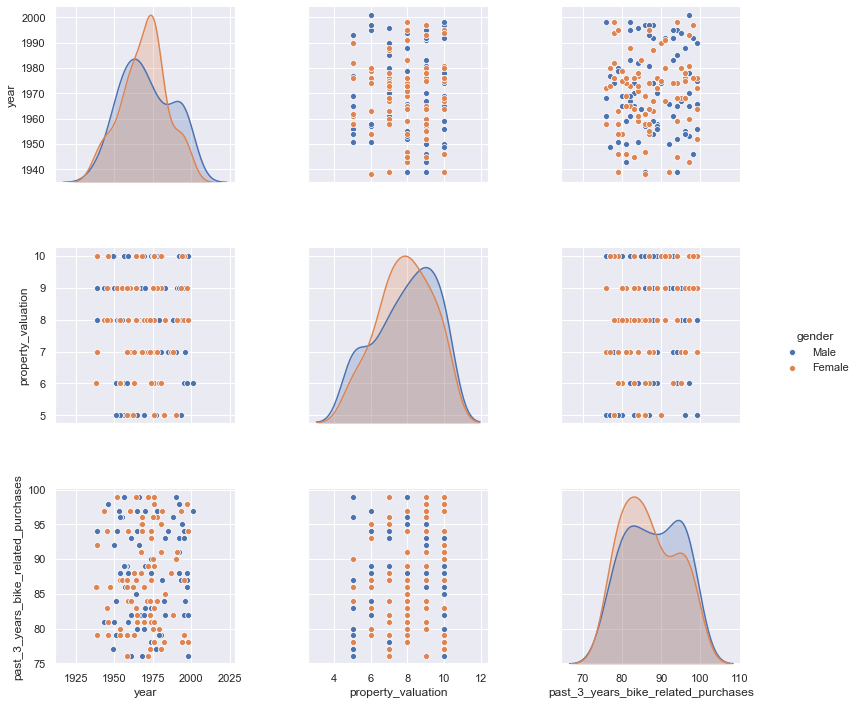

In [934]:
sns.pairplot(final_cust[['year', 'property_valuation', 'past_3_years_bike_related_purchases', 'gender']], hue="gender")
plt.gcf().set_size_inches(12,10)
plt.show()

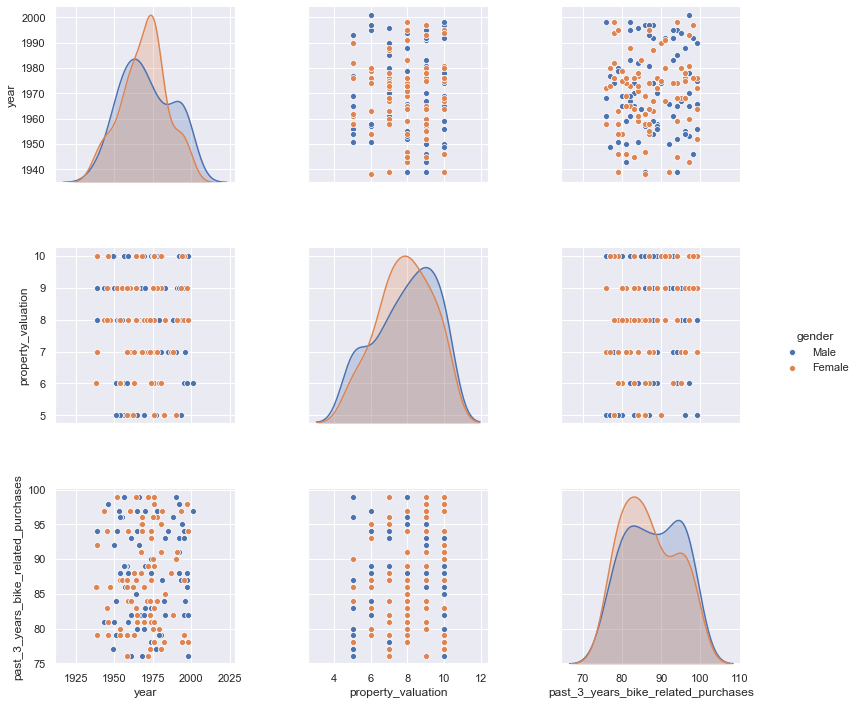

In [935]:

sns.pairplot(final_cust[['year', 'property_valuation', 'past_3_years_bike_related_purchases', 'gender']], hue="gender")
plt.gcf().set_size_inches(12,10)
plt.show()

# 2. BASED on Job Category

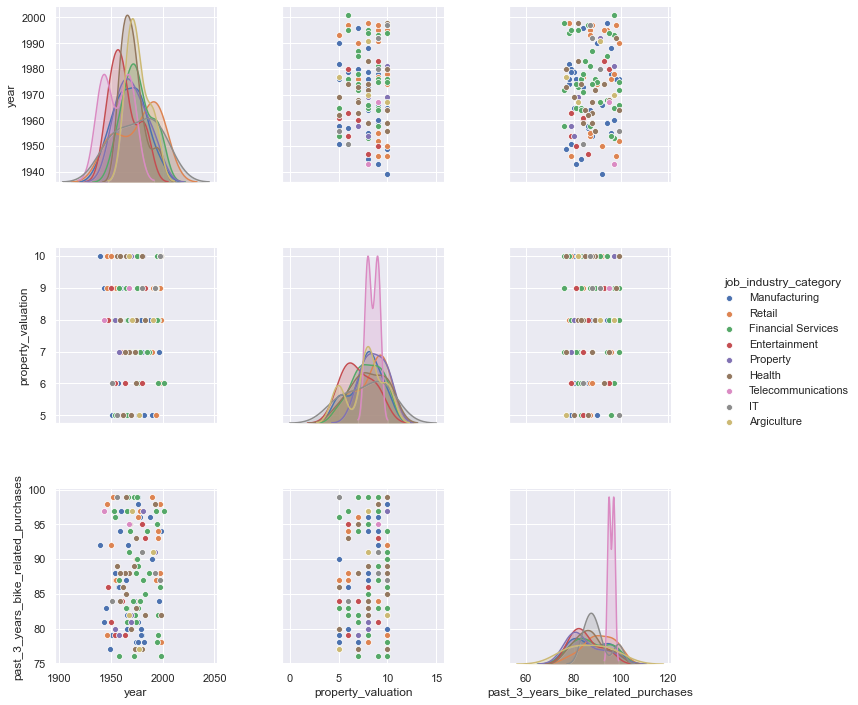

In [936]:
sns.pairplot(final_cust[['year', 'job_industry_category','property_valuation', 'past_3_years_bike_related_purchases','job_title', 'gender']], hue="job_industry_category")
plt.gcf().set_size_inches(12,10)
plt.show()

In [937]:
df_md_salary_industry.Industry[:-3]

0                   Agriculture, forestry and fishing
1                                              Mining
2                                       Manufacturing
3          Electricity, gas, water and waste services
4                                        Construction
5                                     Wholesale trade
6                                        Retail trade
7                     Accommodation and food services
8                   Transport, postal and warehousing
9            Information media and telecommunications
10                   Financial and insurance services
11            Rental, hiring and real estate services
12    Professional, scientific and technical services
13                Administrative and support services
14                   Public administration and safety
15                             Education and training
16                  Health care and social assistance
17                       Arts and recreation services
18                          

In [938]:
# PLOTING using linear REGRESSIon

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [939]:
final_cust.columns

Index(['first_name', 'last_name', 'gender', 'DOB',
       'past_3_years_bike_related_purchases', 'property_valuation',
       'job_title', 'job_industry_category', 'address', 'state', 'year',
       'month'],
      dtype='object')

In [940]:
x_val_one= np.array(final_cust['property_valuation'])
y_target_val= np.array(final_cust['past_3_years_bike_related_purchases'])

In [941]:
len(x_val_one), len(y_target_val)

(159, 159)

In [942]:
x_val_one= x_val_one.reshape(-1,1)

In [943]:
xtrain, xtest, ytrain, ytest= train_test_split(x_val_one, y_target_val)

In [944]:
# TRAINING the model with XTRAIN and YTRAIN dataset

model= LR()
model.fit(xtrain, ytrain)

LinearRegression()

In [945]:
y_predict= model.predict(xtest)

In [946]:
y_predict

array([86.34795906, 89.14504176, 90.07740266, 87.28031996, 88.21268086,
       89.14504176, 90.07740266, 87.28031996, 89.14504176, 85.41559816,
       90.07740266, 88.21268086, 88.21268086, 88.21268086, 89.14504176,
       90.07740266, 90.07740266, 85.41559816, 88.21268086, 88.21268086,
       85.41559816, 89.14504176, 87.28031996, 90.07740266, 89.14504176,
       87.28031996, 89.14504176, 89.14504176, 90.07740266, 89.14504176,
       90.07740266, 90.07740266, 86.34795906, 90.07740266, 89.14504176,
       87.28031996, 87.28031996, 88.21268086, 87.28031996, 87.28031996])

In [947]:
# FINDING mean squared ERROR

mean_squared_error(ytest, y_predict)

47.705437107110605

# ploting the TEST data sets and TRAIN data sets

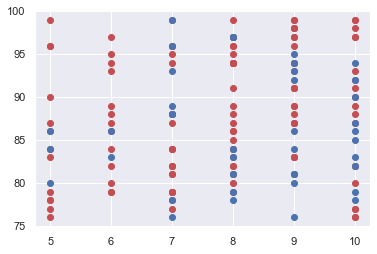

In [948]:
plt.scatter(xtrain, ytrain, c='r')
plt.scatter(xtest, ytest, c='b')

In [998]:
len(final_cust), len(final_potential_cust)

(159, 161)

In [999]:
final_cust.columns

Index(['first_name', 'last_name', 'gender', 'DOB',
       'past_3_years_bike_related_purchases', 'property_valuation',
       'job_title', 'job_industry_category', 'address', 'state', 'year',
       'month'],
      dtype='object')

In [1001]:
final_cust.job_industry_category.unique()

array(['Manufacturing', 'Retail', 'Financial Services', 'Entertainment',
       nan, 'Property', 'Health', 'Telecommunications', 'IT',
       'Argiculture'], dtype=object)